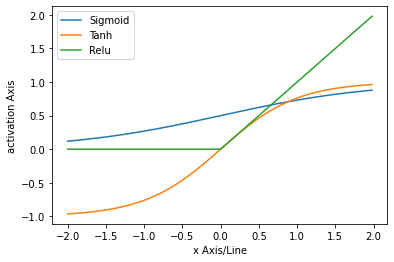

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 2, 0.02)

sigmoid = 1./(1+np.exp(-x))
tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
relu = np.max([np.zeros(len(x)), x], axis=0)

plt.plot(x, sigmoid)
plt.plot(x, tanh)
plt.plot(x, relu)

plt.xlabel('x Axis/Line')
plt.ylabel('activation Axis')
plt.legend(['Sigmoid', 'Tanh', 'Relu'])

plt.show()

Building Perceptron with sigmoid Activation in TensorFlow 2

In [ ]:
import tensorflow as tf

def perceptron(input_dim):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1, input_dim=input_dim, activation='sigmoid'))
    return model
    

Using the Summary() method

In [ ]:
my_perceptron = perceptron(input_dim=5)

my_perceptron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Multi Layered Perceptron (MLP)

In [ ]:
import tensorflow as tf

def mlp(input_dim):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(3, input_dim=input_dim, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return model
    

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#Problem 1 - 

In [ ]:
from re import X
class FC:
    def _init_(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = initializer.B(self.n_nodes2)
        self.optimizer = optimizer
        self.MW = 0
        self.MB = 0

    def forward(self,x):
        self.Z = x
        self.A = x @ self.W + self.B
        return self.A
    
    def backward(self, dA):
        self.dB = np.sum(dA, axis=0)
        self.dW = self.Z.T @ dA
        self.dZ = dA @ self.W.T
        self = self.optimizer.update(self)
        return self.dZ

#Problem 2 - Initialization Method

In [ ]:
class SimpleInitializer:

    def _init_(self, sigma):
        self.sigma = sigma
    
    def W(self, n_nodes1, n_nodes2):
        W = self.sigma * np.random(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

#Problem 3

In [ ]:
class SGD:

    def _init_(self, lr):
        self.lr = lr

    def update(self, layer):
        layer.W -= self.lr * layer.dW / len(layer.Z)
        layer.B -= self.lr * layer.dB / len(layer.Z)
        return layer

#Problem 4 - ACtivation Functions

In [ ]:
class Sigmoid:

    def forward(self, A):
        self.A = A
        Z = 1 / (1 + np.exp(-self.A))
        return Z
    
    def backward(self, dZ):
        dA = dZ * ((1 / (1 + np.exp(-self.A))) - (1 / (1 + np.exp(-self.A)))**2)
        return dA

In [ ]:
class Tanh:

    def forward(self, A):
        self.A = A
        Z = np.tanh(self.A)
        return Z
    
    def backward(self, dZ):
        dA = dZ * (1 - np.tanh(self.A)**2)
        return dA

In [ ]:
class softmax:

    def forward(self, A):
        Z = np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
        return Z

    def backward(self, Z, y):
        dA = Z - y
        loss = - np.sum(y * np.log(Z)) / len(y)
        return dA, loss

#Problem 5


In [ ]:
class ReLU:

    def forward(self, A):
        self.A = A
        Z = np.maximum(0, A)
        return Z

    def backward(self, dZ):
      dA = dZ * np.where(self.A > 0, 1, 0)
      return dA

#Problem 6 - Initial Weight Value

In [ ]:
class XavierInitializer:

    def _init_(self, sigma):
        _ = sigma
    
    def W(self, n_nodes1, n_nodes2):
        self.sigma = 1 / np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

In [ ]:
class HeInitializer:

    def _init_(self, sigma):
        _ = sigma
    
    def W(self, n_nodes1, n_nodes2):
        self.sigma = np.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

#Problem 7 - Optimization Method

In [ ]:
class AdaGrad:

    def _init_(self, lr):
        self.lr = lr

    def update(self, layer):
        layer.HW += layer.dW + layer.dW
        layer.HB += layer.dB + layer.dB
        delta = len-7
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.HW) + delta) / len(layer.Z)
        layer.B -= self.lr * layer.dB / (np.sqrt(layer.HB) + delta) / len(layer.Z)
        return layer

#Problem 8 - Class Completion

In [ ]:
class GetMiniBatch:

    def _init_(self, x, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(x.shape[0]))
        self._x = x[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(x.shape[0]/self.batch_size).astype(np.int)

    def _len_(self):
        return self._stop
    
    def _getitem_(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._x[p0:p1], self._y[p0:p1]

    def _iter_(self):
        self._counter = 0
        return self
    
    def _next_(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._x[p0:p1], self._y[p0:p1]


In [ ]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.sigma = 0.02
        self.lr = 0.5
        self.epoch = epoch
        self.optimizer = optimizer
        self.initializer = initializer
        self.activater = activater

    def fit(self, x, y, x_val=None, y_val=None):
        self.loss_train = []
        self.loss_val = []
        optimizer = self.optimizer(self.lr)
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation3 = softmax()

        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(x, y, batch_size=self.batch_size, seed=i)
            for mini_x, mini_y in get_mini_batch:
                A1 = self.FC1.forward(mini_x)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                #print(Z2.shape)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                dA3, loss = self.activation3.backward(Z3, mini_y)
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1)
              
            if self.verbose:
                A1 = self.FC1.forward(x)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                self.loss_train.append(self.activation3.backward(Z3, y)[1])

                if x_val is not None:
                    A1 = self.FC1.forward(x_val)
                    Z1 = self.activation1.forward(A1)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)
                    self.loss_val.append(self.activation3.backward(Z3, y_val)[1])

    def predict(self, x):
        A1 = self.FC1.forward(x)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return np.argmax(Z3, axis=1)

#Problem 9 - Learning & Estimation

In [ ]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)
x_train /= 255
x_test /= 255

<ipython-input-19-27b4c89056b1>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = x_train.astype(np.float)
<ipython-input-19-27b4c89056b1>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test.astype(np.float)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_val[:, np.newaxis])

In [ ]:
SDNN = ScratchDeepNeuralNetrowkClassifier(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)

SDNN.fit(x_train, y_train_one_hot, x_val, y_test_one_hot)

In [ ]:
pred = SDNN.predict(x_val)
accuracy_score(y_val, pred)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_train, label='train')
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN.epoch+1)));

In [ ]:
class ScratchDeepNeuralNetrowkClassifier_4():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_nodes3 = 150
        self.n_output = 10
        self.sigma = 0.02
        self.lr = 0.5
        self.epoch = epoch
        self.optimizer = optimizer
        self.initializer = initializer
        self.activater = activater

    def fit(self, x, y, x_val=None, y_val=None):
        self.loss_train = []
        self.loss_val = []
        optimizer = self.optimizer(self.lr)

        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation4 = softmax()

        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(x, y, batch_size=self.batch_size, seed=i)
            for mini_x, mini_y in get_mini_batch:
                self.forward(mini_x)
                self.backward(mini_y)
            
            if self.verbose:
                self.forward(x)
                self.loss_train.append(self.activation4.backward(self.Z4, y)[1])

                if x_val is not None:
                    self.forward(x_val)
                    self.loss_val.append(self.activation4.backward(self.Z4, y_val)[1])
        
        def forward(self, x):
                A1 = self.FC1.forward(x)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                A4 = self.FC4.forward(Z3)
                self.Z4 = self.activation4.forward(A4)

    def backward(self,y):
                dA4, self.loss = self.activation4.backward(self.Z4, y)
                dZ3 = self.FC4.backward(dA4)
                dA3 = self.activation3.backward(dZ3)
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1)

    def predict(self, x):
        self.forward(x)
        return np.argmax(self.Z4, axis=1)

In [ ]:
SDNN4 = ScratchDeepNeuralNetrowkClassifier_4(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN4.fit(x_train, y_train_one_hot, x_val, y_test_one_hot)

pred = SDNN4.predict(x_val)
accuracy_score(y_val, pred)

In [ ]:
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_train, label='train')
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN.epoch+1)));

In [ ]:
class ScratchDeepNeuralNetrowkClassifier_6():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_nodes3 = 150
        self.n_nodes4 = 100
        self.n_nodes5 = 50
        self.n_output = 10
        self.sigma = 0.02
        self.lr = 0.5
        self.epoch = epoch
        self.optimizer = optimizer
        self.initializer = initializer
        self.activater = activater

    def fit(self, x, y, x_val=None, y_val=None):
        self.loss_train = []
        self.loss_val = []
        optimizer = self.optimizer(self.lr)

        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_nodes4, self.initializer(self.sigma), optimizer)
        self.activation4 = self.activater()
        self.FC5 = FC(self.n_nodes4, self.n_nodes5, self.initializer(self.sigma), optimizer)
        self.activation5 = self.activater()
        self.FC6 = FC(self.n_nodes5, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation6 = softmax()

        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(x, y, batch_size=self.batch_size, seed=i)
            for mini_x, mini_y in get_mini_batch:
                self.forward(mini_x)
                self.backward(mini_y)
            
            if self.verbose:
                self.forward(x)
                self.loss_train.append(self.activation6.backward(self.Z6, y)[1])

                if x_val is not None:
                    self.forward(x_val)
                    self.loss_val.append(self.activation6.backward(self.Z6, y_val)[1])
        
        def forward(self, x):
                A1 = self.FC1.forward(x)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                A4 = self.FC4.forward(Z3)
                Z4 = self.activation4.forward(A4)
                A5 = self.FC5.forward(Z4)
                Z5 = self.activation5.forward(A5)
                A6 = self.FC5.forward(Z5)
                self.Z6 = self.activation6.forward(A6)

    def backward(self,y):
                dA6, self.loss = self.activation6.backward(self.Z6, y)
                dZ5 = self.FC6.backward(dA6)
                dA5 = self.activation5.backward(dZ5)
                dZ4 = self.FC5.backward(dA5)
                dA4 = self.activation4.backward(dZ4)
                dZ3 = self.FC4.backward(dA4)
                dA3 = self.activation3.backward(dZ3)
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1)

    def predict(self, x):
        self.forward(x)
        return np.argmax(self.Z6, axis=1)

In [ ]:
SDNN6 = ScratchDeepNeuralNetrowkClassifier_6(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN6.fit(x_train, y_train_one_hot, x_val, y_test_one_hot)

pred = SDNN6.predict(x_val)
accuracy_score(y_val, pred)

In [ ]:
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_train, label='train')
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN6.epoch+1)));

In [ ]:
class General_ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU, n_nodes=None):
        self.verbose = verbose
        self.batch_size = 20
        self.sigma = 0.02
        self.lr = 0.5
        self.epoch = epoch
        self.optimizer = optimizer
        self.initializer = initializer
        self.activater = activater
        self.n_nodes = n_nodes

    def fit(self, x, y, x_val=None, y_val=None):
        self.loss_train = []
        self.loss_val = []
        optimizer = self.optimizer(self.lr)
        self.fcs = []
        self.act = []
    
        for i in range(len(self.n_nodes)-2):
            self.fcs.append(FC(self.n_nodes[i], self.n_nodes[i+1], self.initializer(self.sigma), optimizer))
            self.act.append(self.activater())
        self.fcs.append(FC(self.n_nodes[i+1], self.n_nodes[-1], self.initializer(self.sigma), optimizer))
        self.act.append(softmax())  
          
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(x, y, batch_size=self.batch_size, seed=i)
            for mini_x, mini_y in get_mini_batch:
                A = []
                Z = []
                for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                    if i ==0:
                        A.append(f.forward(mini_x))
                        Z.append(a.forward(A[i]))
                    else:
                      A.append(f.forward(Z[i-1]))
                      Z.append(a.forward(A[i]))
                dA = []
                dZ = []